[115.2         41.77657188   2.32092066   3.0057033    2.68911781
   1.33853339]
[  1.33810764   3.68986714  66.41760861  51.28583383  57.32363204
 115.16335828]


/var/folders/9z/f33049_x6bs5y2xvclxp23j00000gn/T/ipykernel_51136/775346326.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(device_list, rotation=45, ha="right", fontsize=14)


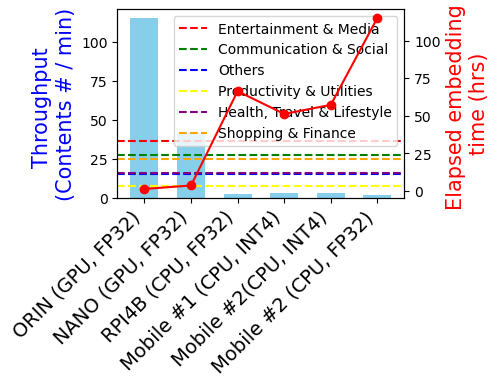

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 设置字体类型
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# 加载CSV数据
device_list = ["ORIN (GPU, FP32)", "NANO (GPU, FP32)", "RPI4B (CPU, FP32)", "Mobile #1 (CPU, INT4)", "Mobile #2(CPU, INT4)",  "Mobile #2 (CPU, FP32)", ]
throughput = np.array([1.92, 0.038682011 * 18, 0.038682011, 0.050095055, 1 / (8.42607 + 0.43394 * 32), 1 / (30.9391 + 0.43394 * 32)]) * 60  # per second, converted to per minute 数据来源，data/zzl/energy/result.csv

print(throughput)

# 修改绘图函数，将其简化为绘制一组设备的柱状图
def plot_modality_bar(modality):
    fig, ax1 = plt.subplots(figsize=(5, 4))

    # 设置柱的宽度和位置
    bar_positions = np.arange(len(device_list))

    # 绘制柱状图
    ax1.bar(bar_positions, throughput, width=0.6, color='skyblue')

    # 设置标题和标签
    # ax1.set_title(f'{modality.capitalize()} Modality')
    # ax1.set_xlabel('Device')
    ax1.set_ylabel('Throughput \n(Contents # / min)', fontdict={'color': 'blue', 'fontsize': 15})

    # 设置x轴刻度和标签
    ax1.set_xticklabels(device_list, rotation=45, ha="right", fontsize=14)

    ax2 = ax1.twinx()
    num_total = 9249 # 换成统计出来的平均数
    print(num_total / throughput / 60)
    ax2.plot(device_list, num_total / throughput / 60, color='red', marker='o')
    ax2.set_ylabel('Elapsed embedding \ntime (hrs)', fontdict={'color': 'red', 'fontsize': 15})

    app = ["Entertainment & Media", "Communication & Social", "Others", "Productivity & Utilities", "Health, Travel & Lifestyle", "Shopping & Finance"]
    frequency = [36.27, 27.62, 14.95, 7.68, 15.81, 25.00]
    color = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
    for i in range(len(app)):
        ax1.axhline(y=frequency[i], color = color[i], linestyle='--', label=app[i])

    # plt.ylim(0, 65)
    ax1.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.savefig('../figs/motivation-thread-bar.pdf', bbox_inches="tight")
    # plt.yscale('log')
    plt.show()

# 绘制柱状图
plot_modality_bar("vision")